In [101]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.plotly as py
import pandas_profiling as pdp
import plotly.graph_objs as go
#plotly.__version__
#plotly.tools.set_credentials_file(username='jordanvi', api_key='eWMeFHaplpUZvrjlAUZ9')

/Users/jordanvidal/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.




In [3]:
from subprocess import check_output
print(check_output(["ls", "data/"]).decode("utf8"))

air_reserve.csv.zip
air_store_info.csv.zip
air_visit_data.csv.zip
date_info.csv.zip
hpg_reserve.csv.zip
hpg_store_info.csv.zip
sample_submission.csv.zip
store_id_relation.csv.zip



* Hot Pepper Gourmet (hpg): similar to Yelp, here users can search restaurants and also make a reservation online

* AirREGI / Restaurant Board (air): similar to Square, a reservation control and cash register system

# Air data exploration

## 1. Air reservation

In [4]:
air_reserve = pd.read_csv("data/air_reserve.csv.zip", compression="zip")
air_reserve.head(4)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2


In [392]:
air_reserve.loc[air_reserve['air_store_id'] == "air_00a91d42b08b08d9"]

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
17963,air_00a91d42b08b08d9,2016-10-31 20:00:00,2016-10-31 16:00:00,2
30808,air_00a91d42b08b08d9,2016-12-05 19:00:00,2016-12-01 15:00:00,9
34613,air_00a91d42b08b08d9,2016-12-14 19:00:00,2016-12-08 10:00:00,18
36458,air_00a91d42b08b08d9,2016-12-17 19:00:00,2016-12-11 16:00:00,2
37992,air_00a91d42b08b08d9,2016-12-20 20:00:00,2016-12-18 17:00:00,4
63768,air_00a91d42b08b08d9,2017-02-18 18:00:00,2017-02-13 01:00:00,9
65859,air_00a91d42b08b08d9,2017-02-23 20:00:00,2017-02-21 21:00:00,12
68499,air_00a91d42b08b08d9,2017-03-01 19:00:00,2017-02-18 02:00:00,3
73921,air_00a91d42b08b08d9,2017-03-14 19:00:00,2017-03-14 15:00:00,4
77076,air_00a91d42b08b08d9,2017-03-21 17:00:00,2017-03-16 13:00:00,3


In [379]:
unique_air_store_id_reserve = len(air_reserve['air_store_id'].unique())
print(unique_air_store_id_reserve)

314


In [319]:
air_reserve.shape

(92378, 4)

In [320]:
air_reserve.dtypes

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

In [321]:
air_reserve['visit_datetime'] = pd.to_datetime(air_reserve['visit_datetime'])
air_reserve['reserve_datetime'] = pd.to_datetime(air_reserve['reserve_datetime'])

In [322]:
air_reserve.dtypes

air_store_id                object
visit_datetime      datetime64[ns]
reserve_datetime    datetime64[ns]
reserve_visitors             int64
dtype: object

In [323]:
#boolean not necessary
mask = (air_reserve['reserve_datetime'] > "01-01-2016") & (air_reserve['reserve_datetime'] <= "31-12-2016") & air_reserve['reserve_visitors']
mask.describe()

count     92378
unique        2
top       False
freq      77044
dtype: object

In [324]:
air_reserve.loc[mask]

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5
10,air_6b15edd1b4fbb96a,2016-01-02 17:00:00,2016-01-01 22:00:00,3
11,air_6b15edd1b4fbb96a,2016-01-02 17:00:00,2016-01-01 12:00:00,3
14,air_789466e488705c93,2016-01-02 17:00:00,2016-01-02 17:00:00,7
15,air_789466e488705c93,2016-01-02 17:00:00,2016-01-02 17:00:00,41
16,air_789466e488705c93,2016-01-02 17:00:00,2016-01-02 17:00:00,13
18,air_6b15edd1b4fbb96a,2016-01-02 18:00:00,2016-01-01 12:00:00,3
21,air_db80363d35f10926,2016-01-02 18:00:00,2016-01-02 02:00:00,3


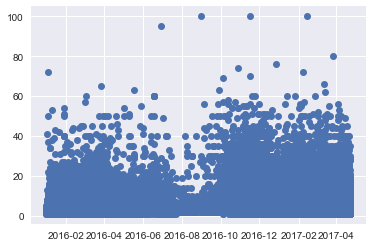

In [331]:
plot1 = plt.plot_date(air_reserve['reserve_datetime'], air_reserve['reserve_visitors'])

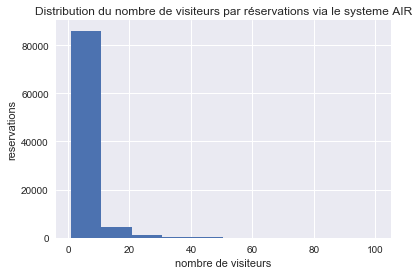

In [90]:
plot2 = plt.hist(air_reserve['reserve_visitors'])
plt.ylabel('reservations')
plt.xlabel('nombre de visiteurs')
plt.title('Distribution du nombre de visiteurs par réservations via le systeme AIR')

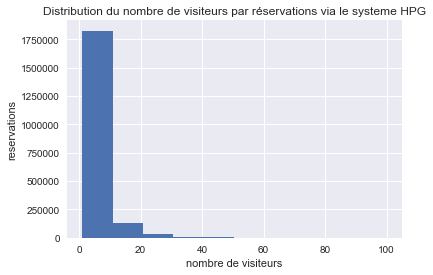

In [91]:
plot3 = plt.hist(hpg_reserve['reserve_visitors'])
plt.ylabel('reservations')
plt.xlabel('nombre de visiteurs')
plt.title('Distribution du nombre de visiteurs par réservations via le systeme HPG')

In [207]:
print("Date minimum de reservation: ", min(air_reserve['reserve_datetime']))
print("Date minimum de visite: ", min(air_reserve['visit_datetime']))
print("################################################")
print("Date maximum de reservation: ", max(air_reserve['reserve_datetime']))
print("Date maximum de visite: ", max(air_reserve['visit_datetime']))

Date minimum de reservation:  2016-01-01 01:00:00
Date minimum de visite:  2016-01-01 19:00:00
################################################
Date maximum de reservation:  2017-04-22 23:00:00
Date maximum de visite:  2017-05-31 21:00:00


In [8]:
print("Les reservations depuis le systeme AIR sont faites entre le ", min(air_reserve['reserve_datetime']), "et le ", max(air_reserve['reserve_datetime']))
print("Les reservations depuis le systeme HPG sont faites entre le ", min(hpg_reserve['reserve_datetime']), "et le ", max(hpg_reserve['reserve_datetime']))

Les reservations depuis le systeme AIR sont faites entre le  2016-01-01 01:00:00 et le  2017-04-22 23:00:00
Les reservations depuis le systeme HPG sont faites entre le  2016-01-01 00:00:00 et le  2017-04-22 23:00:00


In [10]:
print(min(air_reserve['reserve_datetime']),max(air_reserve['reserve_datetime']))
print(min(hpg_reserve['reserve_datetime']),max(hpg_reserve['reserve_datetime']))

2016-01-01 01:00:00 2017-04-22 23:00:00
2016-01-01 00:00:00 2017-04-22 23:00:00


## 2. Air Restaurant Infos

In [11]:
air_store_info = pd.read_csv("data/air_store_info.csv.zip", compression="zip")
air_store_info.head(5)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [12]:
air_store_info.shape

(829, 5)

In [13]:
print("Number of unique air_store_id: ", len(air_store_info['air_store_id'].unique()))
print("Number of unique air_genre_name: ", len(air_store_info['air_genre_name'].unique()))

Number of unique air_store_id:  829
Number of unique air_genre_name:  14


In [14]:
print("Number of unique air_are_name: ", len(air_store_info['air_area_name'].unique()))

Number of unique air_are_name:  103


In [214]:
c = air_store_info['air_genre_name'].value_counts()

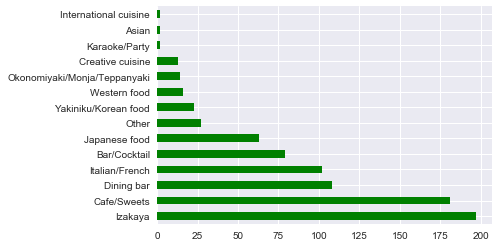

In [215]:
c.plot(kind="barh", color = "green")

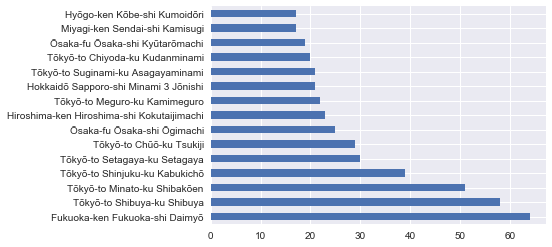

In [30]:
#d = air_store_info['air_area_name'].groupby(air_store_info['air_area_name']).value_counts().nlargest(15)
d = air_store_info['air_area_name'].value_counts().nlargest(15)
d.plot(kind = "barh")

In [27]:
type(c)

pandas.core.series.Series

In [217]:
x = d
data = [go.Bar(x=x,opacity=0.6)]

layout = go.Layout(
    title='Plot Title',
    xaxis=dict(
        title='x Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='y Axis',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')


In [218]:
repartition = c.to_frame()

In [219]:
type(repartition)

pandas.core.frame.DataFrame

In [224]:
repartition.columns = ['occurences']
repartition

,occurences
Izakaya,197
Cafe/Sweets,181
Dining bar,108
Italian/French,102
Bar/Cocktail,79
Japanese food,63
Other,27
Yakiniku/Korean food,23
Western food,16
Okonomiyaki/Monja/Teppanyaki,14


In [225]:
grouped = air_store_info.groupby('air_genre_name')
type(grouped)

pandas.core.groupby.DataFrameGroupBy

In [226]:
group = air_store_info['air_genre_name']

In [227]:
# Repartition en pourcentage
repart = air_store_info.air_genre_name.value_counts(normalize=True) * 100
repart

Izakaya                         23.763571
Cafe/Sweets                     21.833534
Dining bar                      13.027744
Italian/French                  12.303981
Bar/Cocktail                     9.529554
Japanese food                    7.599517
Other                            3.256936
Yakiniku/Korean food             2.774427
Western food                     1.930036
Okonomiyaki/Monja/Teppanyaki     1.688782
Creative cuisine                 1.568154
Karaoke/Party                    0.241255
Asian                            0.241255
International cuisine            0.241255
Name: air_genre_name, dtype: float64

In [228]:
repart_df = repart.to_frame()
type(repart_df)

pandas.core.frame.DataFrame

In [37]:
#final = repart.groupby(level=0).apply(lambda x:100 * x)
#type(final)


In [41]:
#final_df = final.to_frame()
#type(final_df)
#final_df
#final_df.plot.hist(by="air_genre_name")

In [37]:
#air_store_info[['air_area_name']].groupby(['col1', 'col2']).agg(['mean', 'count'])

In [44]:
#plt.hist(air_store_info['air_genre_name'])

In [42]:
aggre = air_store_info.groupby('air_genre_name')['air_store_id'].agg({'Frequency':'count'})
type(aggre)

/Users/jordanvidal/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:

using a dict on a Series for aggregation
is deprecated and will be removed in a future version



pandas.core.frame.DataFrame

# HPG data exploration

## 1. HPG reservation

In [92]:
hpg_reserve = pd.read_csv("data/hpg_reserve.csv.zip", compression="zip")
hpg_reserve.tail()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
2000315,hpg_2b293477ea4642fb,2017-05-31 20:00:00,2017-04-19 07:00:00,2
2000316,hpg_f922aeca48ca5a29,2017-05-31 20:00:00,2017-03-19 00:00:00,3
2000317,hpg_e9151de687b93aa3,2017-05-31 21:00:00,2017-04-14 20:00:00,49
2000318,hpg_fae6c96189b4a122,2017-05-31 21:00:00,2017-04-19 17:00:00,9
2000319,hpg_0b70de808b55ad1e,2017-05-31 23:00:00,2017-04-21 13:00:00,6


In [102]:
pdp.ProfileReport(hpg_reserve)

Number of variables,4
Number of observations,2000320
Total Missing (%),0.0%
Total size in memory,61.0 MiB
Average record size in memory,32.0 B
Numeric,1
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [93]:
hpg_reserve.shape

(2000320, 4)

In [371]:
print("Date minimum de reservation: ", min(hpg_reserve['reserve_datetime']))
print("Date minimum de visite: ", min(hpg_reserve['visit_datetime']))
print("################################################")
print("Date maximum de reservation: ", max(hpg_reserve['reserve_datetime']))
print("Date maximum de visite: ", max(hpg_reserve['visit_datetime']))

Date minimum de reservation:  2016-01-01 00:00:00
Date minimum de visite:  2016-01-01 11:00:00
################################################
Date maximum de reservation:  2017-04-22 23:00:00
Date maximum de visite:  2017-05-31 23:00:00


In [372]:
print("Nombre de hpg_store_id unique: ", len(hpg_reserve['hpg_store_id'].unique()))

Nombre de hpg_store_id unique:  13325


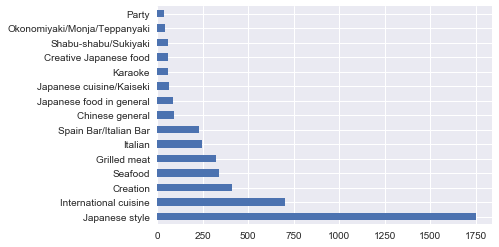

In [99]:
e = hpg_store_info['hpg_genre_name'].value_counts().nlargest(15)
e.plot(kind = "barh")

### Add Air_Store_Id to hpg_reserve dataset


In [373]:
hpg_reserve = pd.merge(hpg_reserve, store_id_relation, how='inner', on=['hpg_store_id'])

In [374]:
hpg_reserve.head(5)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_store_id
0,hpg_878cc70b1abc76f7,2016-01-01 19:00:00,2016-01-01 15:00:00,4,air_db80363d35f10926
1,hpg_878cc70b1abc76f7,2016-01-02 19:00:00,2016-01-02 14:00:00,2,air_db80363d35f10926
2,hpg_878cc70b1abc76f7,2016-01-03 18:00:00,2016-01-02 20:00:00,6,air_db80363d35f10926
3,hpg_878cc70b1abc76f7,2016-01-06 20:00:00,2016-01-04 22:00:00,3,air_db80363d35f10926
4,hpg_878cc70b1abc76f7,2016-01-11 18:00:00,2016-01-11 14:00:00,2,air_db80363d35f10926


In [375]:
hpg_reserve.shape

(28183, 5)

## 2. HPG store info

In [31]:
hpg_store_info = pd.read_csv("data/hpg_store_info.csv.zip", compression="zip")
hpg_store_info.tail()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
4685,hpg_c6ed353a48c7c93e,Sichuan food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4686,hpg_a58d2423360b2fb4,Sichuan food,Tōkyō-to Minato-ku Roppongi,35.666137,139.733978
4687,hpg_d2021704076cdd70,Shanghai food,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
4688,hpg_602472570d65e219,Spain/Mediterranean cuisine,Tōkyō-to Toshima-ku None,35.730068,139.711742
4689,hpg_11801306ce8bfb4f,Udon/Soba,Osaka Prefecture Osaka None,34.701519,135.498859


In [32]:
hpg_store_info.shape

(4690, 5)

In [33]:
hpg_store_info['hpg_store_id'].unique().shape

(4690,)

In [34]:
hpg_store_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4690 entries, 0 to 4689
Data columns (total 5 columns):
hpg_store_id      4690 non-null object
hpg_genre_name    4690 non-null object
hpg_area_name     4690 non-null object
latitude          4690 non-null float64
longitude         4690 non-null float64
dtypes: float64(2), object(3)
memory usage: 183.3+ KB


In [35]:
print("Nombre de hpg_store_id unique: ", len(hpg_store_info['hpg_store_id'].unique()))
#hpg_store_info.groupby('hpg_store_id').hpg_store_id.nunique()
print("Nombre de hpg_genre_name unique: ", len(hpg_store_info['hpg_genre_name'].unique()))
print("abaids", len(hpg_store_info['hpg_area_name'].unique()))

Nombre de hpg_store_id unique:  4690
Nombre de hpg_genre_name unique:  34
abaids 119


In [46]:
hgn = hpg_store_info['hpg_genre_name'].value_counts().nlargest(15)

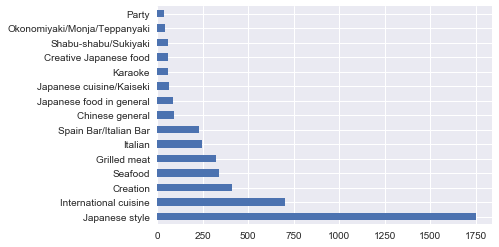

In [47]:
hgn.plot(kind = "barh")

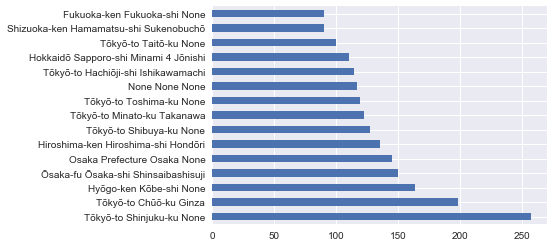

In [52]:
han = hpg_store_info['hpg_area_name'].value_counts().nlargest(15)
han.plot(kind = "barh")

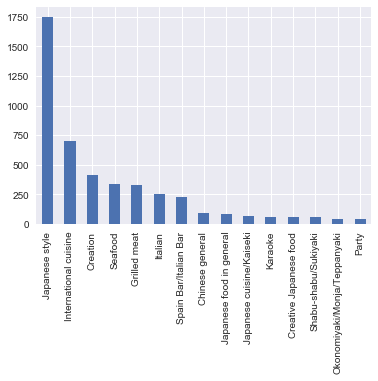

In [57]:
hgn.plot.bar(stacked=True);

### Bring air id to hpg stores


In [355]:
hpg_store_info = pd.merge(hpg_store_info, store_id_relation, how='inner', on=['hpg_store_id'])
hpg_store_info.head(2)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude,air_store_id_x,air_store_id_y,air_store_id_x,air_store_id_y
0,hpg_cac091abfcee2a85,Japanese style,Tōkyō-to Chūō-ku Ginza,35.66860,139.763043,air_2aab19554f91ff82,air_2aab19554f91ff82,air_2aab19554f91ff82,air_2aab19554f91ff82
1,hpg_e87d00be48cd91c6,Japanese style,Tōkyō-to Sumida-ku Tachibana,35.70496,139.828642,air_258ad2619d7bff9a,air_258ad2619d7bff9a,air_258ad2619d7bff9a,air_258ad2619d7bff9a


In [356]:
hpg_store_info.shape

(63, 9)

In [348]:
print("Nombre de hpg_store_id unique: ", len(hpg_store_info['hpg_store_id'].unique()))
#hpg_store_info.groupby('hpg_store_id').hpg_store_id.nunique()
print("Nombre de hpg_genre_name unique: ", len(hpg_store_info['hpg_genre_name'].unique()))

Nombre de hpg_store_id unique:  63
Nombre de hpg_genre_name unique:  16


In [349]:
print("Nombre de restaurants uniques dans info AIR: ", unique_air_store_id_info)
print("Nombre de restaurants uniques dans reservations AIR: ", unique_air_store_id_reserve)
print("#########################")
print("Nombre de restaurants uniques dans info HPG: ", unique_hpg_store_id_info)
print("Nombre de restaurants unique dans reservations HPG: ", unique_hpg_store_id_reserve)
print("#########################")
print("Nombre de restaurants présents dans les sytemes AIR et HPG: ", restaurants_air_hpg)

Nombre de restaurants uniques dans info AIR:  829
Nombre de restaurants uniques dans reservations AIR:  314
#########################
Nombre de restaurants uniques dans info HPG:  4690
Nombre de restaurants unique dans reservations HPG:  13325
#########################
Nombre de restaurants présents dans les sytemes AIR et HPG:  150


In [350]:
unique_restaurants = pd.DataFrame({'unique_air_store_id_info': [unique_air_store_id_info], 
                                   'unique_air_store_id_reserve': [unique_air_store_id_reserve],
                                  'unique_hpg_store_id_info': [unique_hpg_store_id_info],
                                   'unique_hpg_store_id_reserve': [unique_hpg_store_id_reserve],
                                   'restaurants_air_hpg': [restaurants_air_hpg]
                                  })

In [351]:
hpg_restaurants = pd.DataFrame({'unique_hpg_store_id_info': [unique_hpg_store_id_info],
                                   'unique_hpg_store_id_reserve': [unique_hpg_store_id_reserve]})

In [352]:
air_restaurants = pd.DataFrame({'unique_air_store_id_info': [unique_air_store_id_info], 
                                   'unique_air_store_id_reserve': [unique_air_store_id_reserve]})

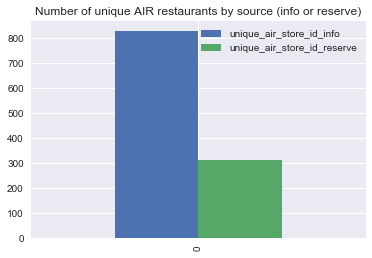

In [353]:
air_restaurants.plot(kind="bar", title="Number of unique AIR restaurants by source (info or reserve)")
# Reservations dans 300 restaurants uniques via AIR, sachant que 800 sont references dans air_store_info 
# Il y a donc 500 restaurants qui ne font object d'aucunes reservations

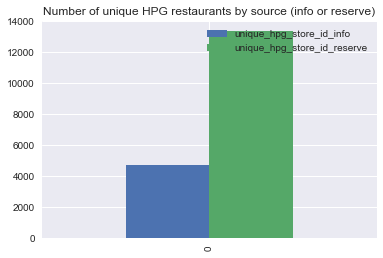

In [354]:
hpg_restaurants.plot(kind="bar", title="Number of unique HPG restaurants by source (info or reserve)")
#reservations sur 13000 restaurants uniques via HPG, sachant que 4690 sont references dans hpg_store_info 
# Il y a donc 9 000 restaurants HPG qui ne sont pas references 
# Question: sont-ils dans AIR ?

> <b>4690</b> restaurants dans HPG mais seulement <b>829</b> restaurant unique dans AIR

> <b>150</b> restaurant inscrits dans HPG et dans AIR

In [81]:
air_store_info2 = air_store_info.copy()
hpg_air_lat_long = air_store_info2.join(store_id_relation.set_index('air_store_id'), on='air_store_id')
store_id_relation2 = store_id_relation.copy()

In [91]:
store_id_relation2.join(air_store_info.set_index('air_store_id'), on='air_store_id')

,air_store_id,hpg_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a,Cafe/Sweets,Fukuoka-ken Fukuoka-shi Daimyō,33.586994,130.394894
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809,Dining bar,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9,Okonomiyaki/Monja/Teppanyaki,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8,Izakaya,Fukuoka-ken Fukuoka-shi Hakata Ekimae,33.591358,130.414878
4,air_965b2e0cf4119003,hpg_653238a84804d8e7,Izakaya,Tōkyō-to Meguro-ku Kamimeguro,35.641463,139.698171
5,air_a38f25e3399d1b25,hpg_50378da9ffb9b6cd,Izakaya,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
6,air_3c938075889fc059,hpg_349b1b92f98b175e,Japanese food,Fukuoka-ken Fukuoka-shi Daimyō,33.589216,130.392813
7,air_68301bcb11e2f389,hpg_2c09f3abb2220659,Izakaya,Tōkyō-to Suginami-ku Asagayaminami,35.699566,139.636438
8,air_5f6fa1b897fe80d5,hpg_40aff6385800ebb1,Izakaya,Shizuoka-ken Shizuoka-shi Ōtemachi,34.975140,138.383243
9,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


In [93]:
store_id_relation2.join(hpg_store_info2.set_index('hpg_store_id'), on='hpg_store_id')

,air_store_id,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a,NaN,NaN,NaN,NaN
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809,Italian,Shizuoka-ken Hamamatsu-shi Sukenobuchō,34.721644,137.738944
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9,NaN,NaN,NaN,NaN
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8,NaN,NaN,NaN,NaN
4,air_965b2e0cf4119003,hpg_653238a84804d8e7,NaN,NaN,NaN,NaN
5,air_a38f25e3399d1b25,hpg_50378da9ffb9b6cd,Japanese style,Tōkyō-to Chiyoda-ku None,35.695780,139.768453
6,air_3c938075889fc059,hpg_349b1b92f98b175e,Japanese style,Fukuoka-ken Fukuoka-shi Ōmiya,33.579734,130.401762
7,air_68301bcb11e2f389,hpg_2c09f3abb2220659,NaN,NaN,NaN,NaN
8,air_5f6fa1b897fe80d5,hpg_40aff6385800ebb1,NaN,NaN,NaN,NaN
9,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,NaN,NaN,NaN,NaN


# Store ID Relation data exploration

In [288]:
store_id_relation = pd.read_csv("data/store_id_relation.csv.zip", compression="zip")
store_id_relation.tail()

,air_store_id,hpg_store_id
145,air_b8925441167c3152,hpg_0cc0abae3a8b52de
146,air_f8233ad00755c35c,hpg_098e4dd30e54fee6
147,air_6607fe3671242ce3,hpg_1004356dc8ab69ec
148,air_ccd19a5bc5573ae5,hpg_df22bf146d2c7e19
149,air_465bddfed3353b23,hpg_23c5945dc1a72454


In [289]:
store_id_relation.shape
# 150 restaurants unique entre air store et hpg store au total ?

(150, 2)

In [290]:
restaurants_air_hpg = store_id_relation.shape[0]

# Air Visit Data exploration

In [332]:
air_visit_data = pd.read_csv("data/air_visit_data.csv.zip", compression="zip")
air_visit_data.tail()

,air_store_id,visit_date,visitors
252103,air_24e8414b9b07decb,2017-04-18,6
252104,air_24e8414b9b07decb,2017-04-19,6
252105,air_24e8414b9b07decb,2017-04-20,7
252106,air_24e8414b9b07decb,2017-04-21,8
252107,air_24e8414b9b07decb,2017-04-22,5


In [293]:
print(min(air_visit_data['visit_date']))
print(max(air_visit_data['visit_date']))
print(min(air_visit_data['visitors']))
print(max(air_visit_data['visitors']))

2016-01-01
2017-04-22
1
877


In [294]:
air_visit_data.shape

(252108, 3)

In [297]:
unique_air_visit_restaurants = len(air_visit_data['air_store_id'].unique())
unique_air_visit_restaurants

829

In [334]:
test_ds2 = pd.DataFrame(air_visit_data['air_store_id'].str.split('_',1).tolist(), columns=['source', 'id'])

In [337]:
print("Unique store id in training data: ", len(test_ds2['id'].unique()))

Unique store id in training data:  829


# Sample Submission data exploration

In [338]:
sample_submission = pd.read_csv("data/sample_submission.csv.zip", compression = "zip")
sample_submission.tail(10)

,id,visitors
32009,air_fff68b929994bfbd_2017-05-22,0
32010,air_fff68b929994bfbd_2017-05-23,0
32011,air_fff68b929994bfbd_2017-05-24,0
32012,air_fff68b929994bfbd_2017-05-25,0
32013,air_fff68b929994bfbd_2017-05-26,0
32014,air_fff68b929994bfbd_2017-05-27,0
32015,air_fff68b929994bfbd_2017-05-28,0
32016,air_fff68b929994bfbd_2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,0
32018,air_fff68b929994bfbd_2017-05-31,0


In [339]:
#df = pd.DataFrame(sample_submission.row.str.split(' ',1).tolist(), columns = ['flips','row'])
df = sample_submission['id']

In [340]:
test_ds = pd.DataFrame(sample_submission['id'].str.split('_',2).tolist(), columns=['source', 'id', 'date'])

In [341]:
test_ds

,source,id,date
0,air,00a91d42b08b08d9,2017-04-23
1,air,00a91d42b08b08d9,2017-04-24
2,air,00a91d42b08b08d9,2017-04-25
3,air,00a91d42b08b08d9,2017-04-26
4,air,00a91d42b08b08d9,2017-04-27
5,air,00a91d42b08b08d9,2017-04-28
6,air,00a91d42b08b08d9,2017-04-29
7,air,00a91d42b08b08d9,2017-04-30
8,air,00a91d42b08b08d9,2017-05-01
9,air,00a91d42b08b08d9,2017-05-02


In [342]:
print("Unique store id in test data: ", len(test_ds['id'].unique()))

Unique store id in test data:  821


In [343]:
len(test_ds['date'].unique())

39

In [344]:
print(min(test_ds['date']))
print(max(test_ds['date']))

2017-04-23
2017-05-31


# Date info exploration

In [305]:
date_info = pd.read_csv("data/date_info.csv.zip", compression = "zip")
date_info.tail(5)

,calendar_date,day_of_week,holiday_flg
512,2017-05-27,Saturday,0
513,2017-05-28,Sunday,0
514,2017-05-29,Monday,0
515,2017-05-30,Tuesday,0
516,2017-05-31,Wednesday,0


In [306]:
print(min(date_info['calendar_date']))
print(max(date_info['calendar_date']))

2016-01-01
2017-05-31


In [307]:
len(date_info['holiday_flg'] == True)

517

In [308]:
df100 = (date_info['holiday_flg'] != 0)

In [309]:
print("# of Holidays :", len(date_info['holiday_flg'] == 1))

# of Holidays : 517


## Preprocessing for prediction

Getting dates into numerical columns is a common operation when time series are analyzed with non-parametric predictors. The code below makes all possible choices: ordered columns for the year, month, day, weekday, week, and day in the year, and one-hot columns for year month, day, weekday, and week.

In [88]:
air_reserve

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5
5,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2
6,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4
7,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-02 14:00:00,2
8,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-01 20:00:00,2
9,air_2b8b29ddfd35018e,2016-01-02 17:00:00,2016-01-02 17:00:00,2


In [2]:
delta = air_reserve['visit_datetime'] - air_reserve['reserve_datetime']


NameError: name 'air_reserve' is not defined

In [1]:
type(delta)

NameError: name 'delta' is not defined

In [ ]:
data_encoded = air_reserve + delta

/Users/jordanvidal/python3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3033: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [ ]:
air_reserve = ar

In [115]:
delta = air_reserve['visit_datetime'] - air_reserve['reserve_datetime']
data_encoded = air_reserve + delta

# following http://stackoverflow.com/questions/16453644/regression-with-date-variable-using-scikit-learn
data_encoded['visit_datetime'] = pd.to_datetime(data_encoded['visit_datetime'])
data_encoded['reserve_datetime'] = pd.to_datetime(data_encoded['reserve_datetime'])
data_encoded['v_year'] = data_encoded['visit_datetime'].dt.year
data_encoded['v_month'] = data_encoded['visit_datetime'].dt.month
data_encoded['v_day'] = data_encoded['visit_datetime'].dt.day
data_encoded['v_weekday'] = data_encoded['visit_datetime'].dt.weekday
data_encoded['r_week'] = data_encoded['visit_datetime'].dt.week

data_encoded['delta'] = data_encoded['delta'].dt.day

data_encoded['r_year'] = data_encoded['reserve_datetime'].dt.year
data_encoded['r_month'] = data_encoded['reserve_datetime'].dt.month
data_encoded['r_day'] = data_encoded['reserve_datetime'].dt.day
data_encoded['r_weekday'] = data_encoded['reserve_datetime'].dt.weekday
data_encoded['r_week'] = data_encoded['reserve_datetime'].dt.week
#data_encoded['n_days'] = data_encoded['visit_datetime'].apply(lambda date: (date - pd.to_datetime("1970-01-01")).days)

data_encoded = data_encoded.join(pd.get_dummies(data_encoded['year'], prefix='y'))
data_encoded = data_encoded.join(pd.get_dummies(data_encoded['month'], prefix='m'))
data_encoded = data_encoded.join(pd.get_dummies(data_encoded['day'], prefix='d'))
#data_encoded = data_encoded.join(pd.get_dummies(data_encoded['weekday'], prefix='wd'))
data_encoded = data_encoded.join(pd.get_dummies(data_encoded['week'], prefix='w'))


/Users/jordanvidal/python3/lib/python3.6/site-packages/pandas/core/indexes/base.py:3033: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


ValueError: can only convert an array of size 1 to a Python scalar

In [ ]:
# What about HORAIRE ? Heure ? Minute Secondes ?

In [94]:
pd.set_option('display.max_columns', None)

In [96]:
data_encoded.tail(10)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,year,month,day,weekday,week,n_days,y_2016,y_2017,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,w_11,w_12,w_13,w_14,w_15,w_16,w_17,w_18,w_19,w_20,w_21,w_22,w_23,w_24,w_25,w_26,w_27,w_28,w_29,w_30,w_32,w_35,w_36,w_37,w_40,w_43,w_44,w_45,w_46,w_47,w_48,w_49,w_50,w_51,w_52,w_53
92368,air_8093d0b565e9dbdf,2017-05-28 19:00:00,2017-04-02 18:00:00,7,2017,5,28,6,21,17314,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92369,air_0867f7bebad6a649,2017-05-28 23:00:00,2017-02-01 22:00:00,48,2017,5,28,6,21,17314,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92370,air_1033310359ceeac1,2017-05-28 23:00:00,2017-04-15 22:00:00,2,2017,5,28,6,21,17314,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92371,air_1033310359ceeac1,2017-05-28 23:00:00,2017-04-18 17:00:00,2,2017,5,28,6,21,17314,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92372,air_12c4fb7a423df20d,2017-05-29 12:00:00,2017-04-17 20:00:00,9,2017,5,29,0,22,17315,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6,2017,5,29,0,22,17315,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8,2017,5,30,1,22,17316,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3,2017,5,31,2,22,17317,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10,2017,5,31,2,22,17317,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3,2017,5,31,2,22,17317,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### A linear regressor baseline

We drop the target column and the original data column.

In [107]:
features = data_encoded.drop(['reserve_visitors','visit_datetime','reserve_datetime','air_store_id'], axis=1)
X_columns = data_encoded.columns.drop(['reserve_visitors','visit_datetime','reserve_datetime','air_store_id'])
X = features.values
y = data_encoded['reserve_visitors'].values

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)